# Correlations

In this notebook I will be exploring correlations across datasets using the pandas library. This will be done by comparing columns with the target variable CAT_ELIG to find highly correlated features. Two variables are correlated when they move in coordination with one another. This aids in establishing statistical predictions. Finding correlations with the target variable will help us set up a predictive model to determine areas at risk for food insecurity.
Only some individuals were ineligible for SNAP benefits in 2007, but in 2017 all applications were approved. Therefore, finding correlations in the 2007 datasets will be an efficient measure, but not for the 2017 datasets. So I will only use correlated 2007 datasets and examine how those variables changed in 2017. 

## Table of Contents
* [Imports](#Imports)
   * [2007](#2007)
   * [2017](#2017)
* [Feature Selection](#Feature_Selection)
   * [Correlation Dataframes](#Coreelation_Dataframes)
   * [Correlation Plots](#Correlation_Plots)
   * [Observations](#Observations)
   * [Correlated Features](#Correlated_Features)
* [Final Dataset](#Final_Dataset)

# Imports

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
pip install missingno

You should consider upgrading via the 'C:\Users\Bhakt\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
import missingno as msno

In [7]:
from sklearn.decomposition import PCA
import autoreload
%load_ext autoreload
%autoreload 2

In [8]:
import python_code.Scripts as sc

In [9]:
import python_code.Reference as ref

In [10]:
#New Mexico
nm07 = pd.read_csv('./SNAP_Data/clean_nm07.csv')
nm17 = pd.read_csv('./SNAP_Data/clean_nm17.csv')

In [11]:
#Nebraska
ne07 = pd.read_csv('./SNAP_Data/clean_ne07.csv')
ne17 = pd.read_csv('./SNAP_Data/clean_ne17.csv')

# Feature Selection

## Correlated Dataframes

I will use some excel lists compiled from the original data dictionaries to find the related features, if found, and put them into individual groupings of dataframes.

### Correlation Plots

Referenced csv files:

In [12]:
#2007 datasets
unit07_demo= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/07_DataDict/UNIT_Demo.csv')
unit07_assests= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/07_DataDict/UNIT_Assets.csv')
unit07_exed= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/07_DataDict/UNIT_ExDed.csv')
unit07_inc= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/07_DataDict/UNIT_Inc.csv')
per07_char= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/07_DataDict/PERS_Char.csv')
per07_inc= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/07_DataDict/PERS_Inc.csv')

In [13]:
#2017 datasets
unit17_demo= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/17_DataDict/UNIT_Demo.csv')
unit17_assests= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/17_DataDict/UNIT_Assets.csv')
unit17_exed= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/17_DataDict/UNIT_ExDed.csv')
unit17_inc= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/17_DataDict/UNIT_Inc.csv')
per17_char= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/17_DataDict/PERS_Char.csv')
per17_inc= pd.read_csv('C:/Users/Bhakt/Desktop/SNAP/SNAP_Data/17_DataDict/PERS_Inc.csv')

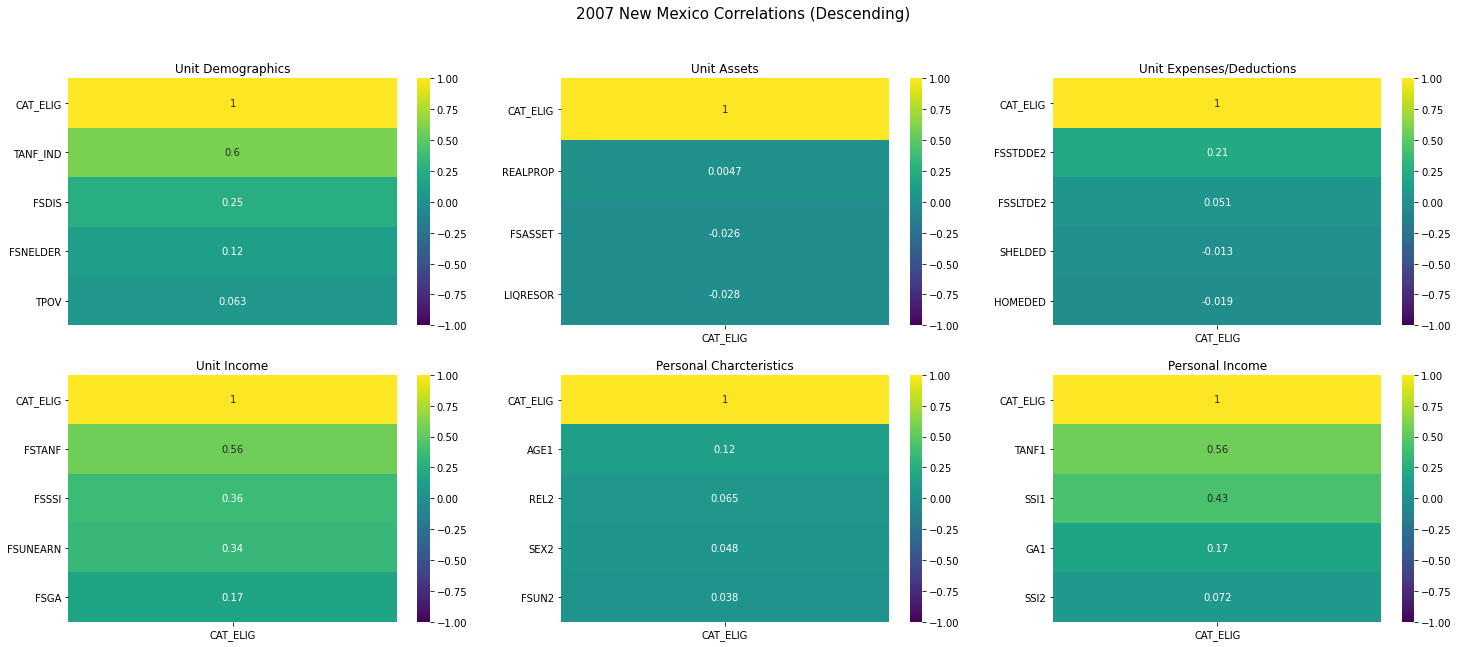

In [14]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_nm07.png');

Above I am comparing each variable type to the category eligible in a heat map correlation model. I will be sorting by descending and ascending order so we can interpret the 5 highest correlations and the 5 lowest. 
Sorting by descending helps us see the strongest correlation on top (yellow). A 1 to 1 correlation means it's a perfect correlation. Therefore category eligible is the most correlated because it is being compared to itself. 
Each variable we’ve compared to category eligible are divided by categories: unit demographics, unit assets, unit expenses/deductions,unit income, personal characteristics, and personal income. The highest correlated variable is TANF_IND at a 0.6. Then follow FSTANF and TANF1 at 0.56, SSI1 at 0.43, and FSSSI at 0.36. 


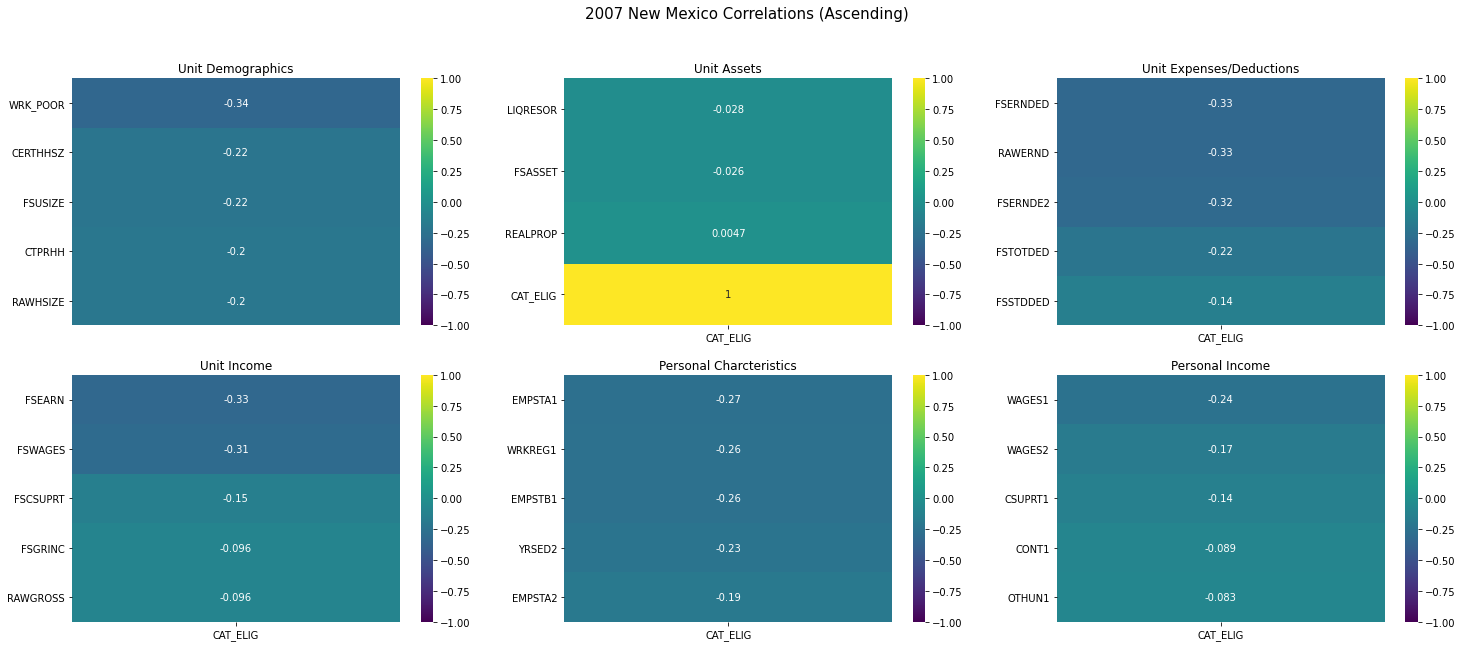

In [41]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_nm07.png');

The lowest correlations will be shown at the top of these heatmaps. The lowest correlated variable from the 2007 NM dataset was WRK_POOR at -0.34 and at -0.33 FSEARN and FSERNDED follow.

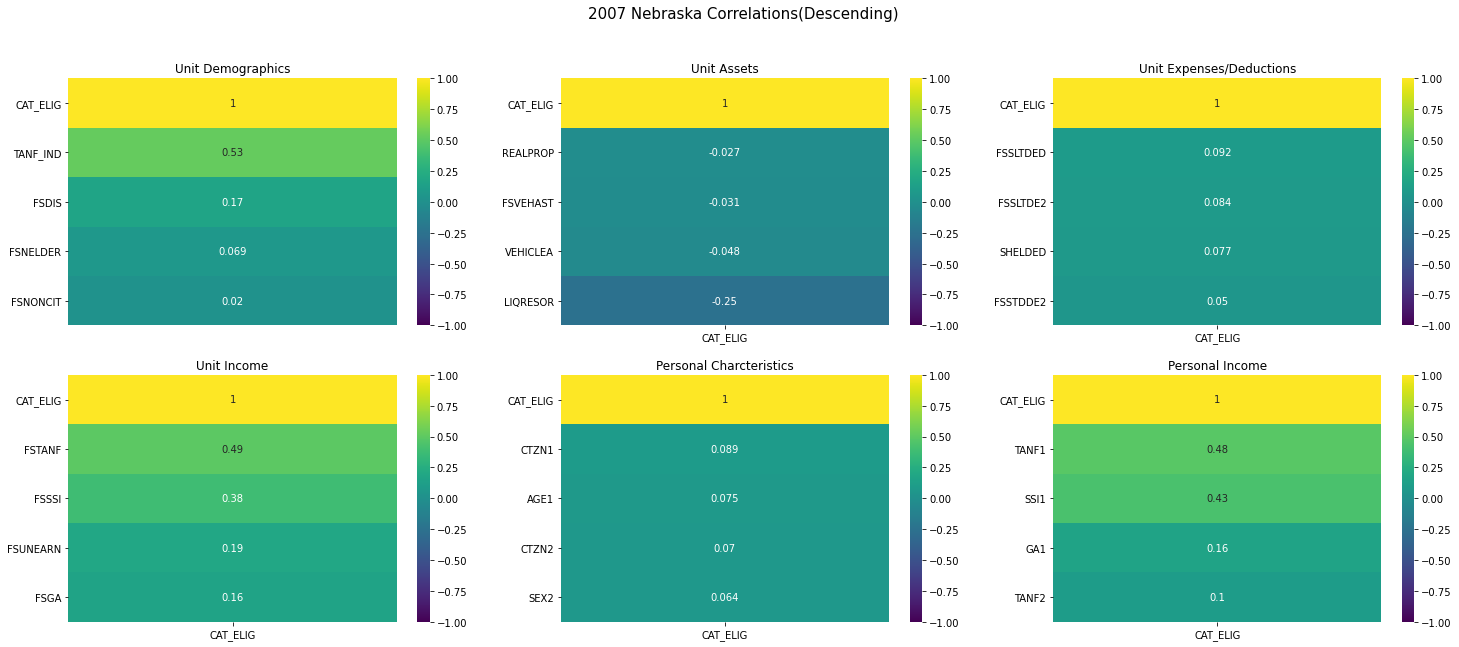

In [16]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_ne07.png');

The top 5 correlations for Nebraska 2007 were TANF_IND at 0.53, FSTANF at 0.49, TANF_1 at 0.48, SSI1 at 0.43, FSSSI at 0.38.

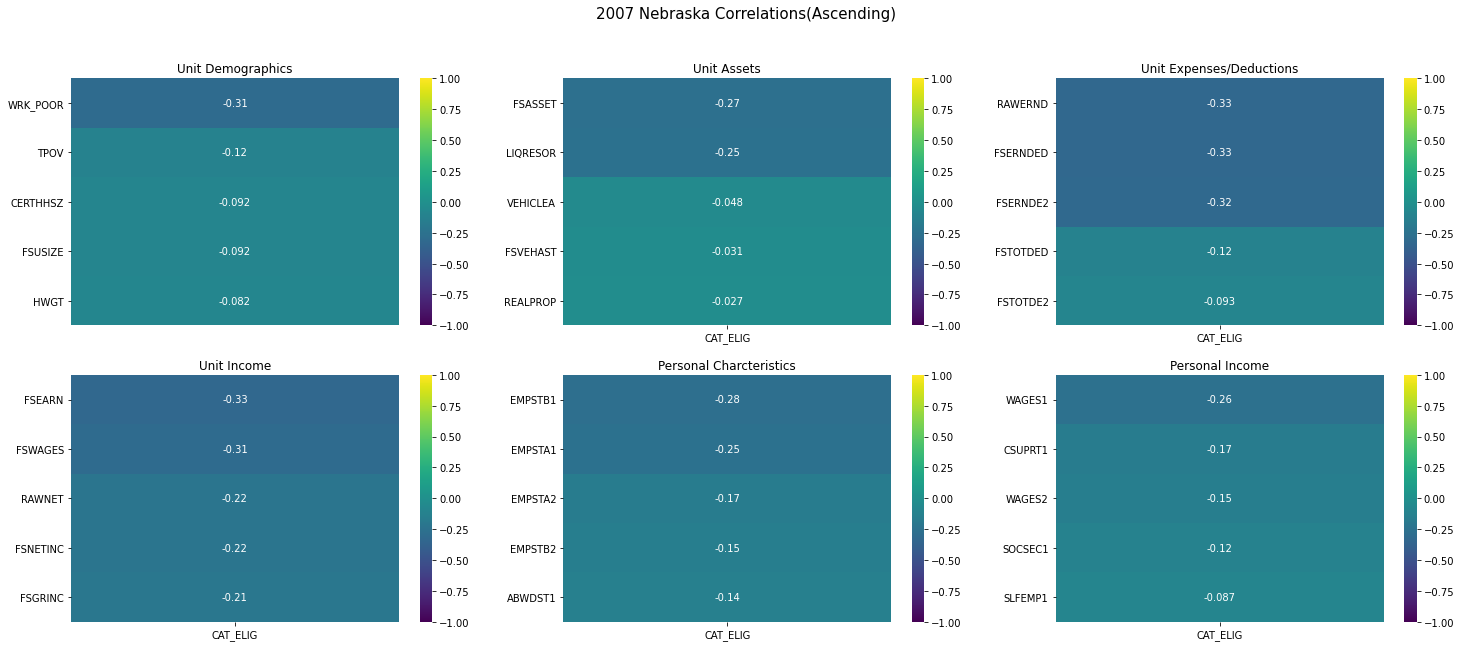

In [42]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_ne07.png');

The weakest correlations for 2007 Nebraska were RAWEARNED -0.33, FSERN -0.33, and WRK_POOR -0.31.

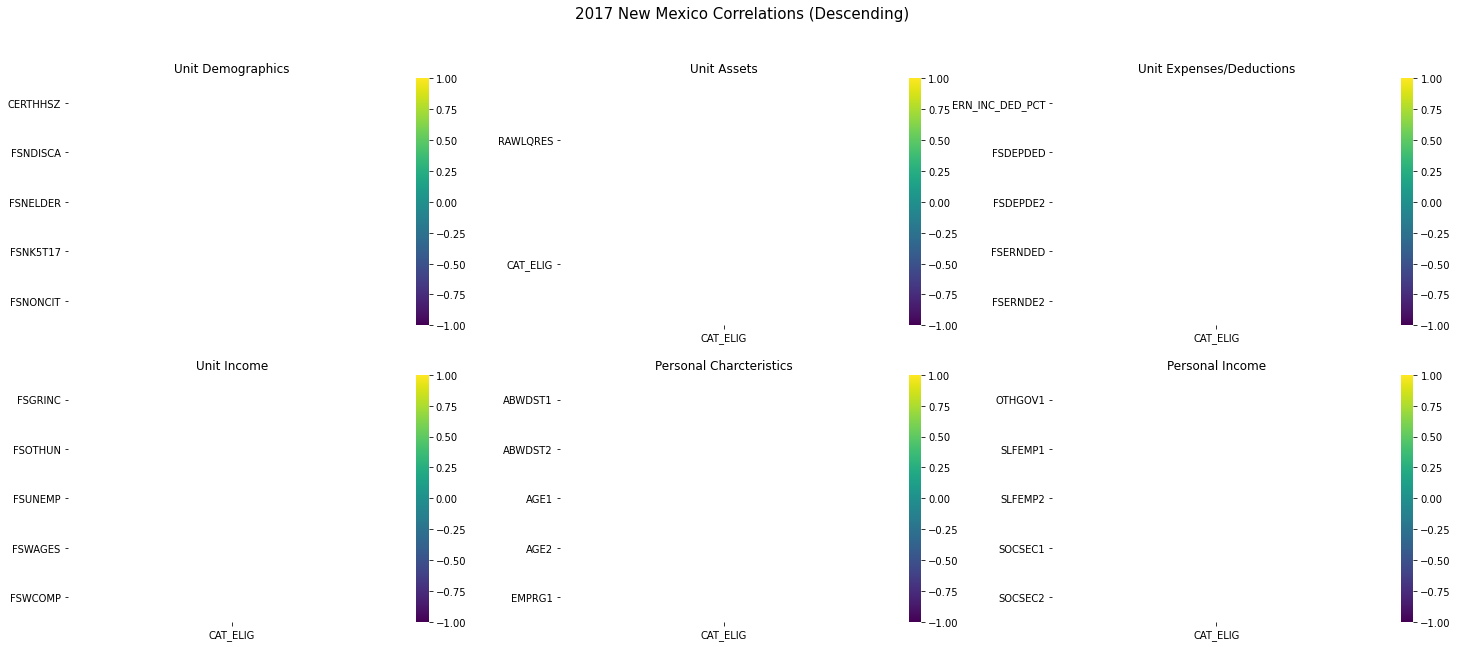

In [63]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 New Mexico Correlations (Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit17_demo, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit17_assets, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit17_exded, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per17_char, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_nm17.png');

In [61]:
sc.corr_df(ref.unit17_demo, ne17)

,CERTHHSZ,FSNDISCA,FSNELDER,FSNK5T17,FSNONCIT,FSUSIZE,CAT_ELIG
0,2.0,2.0,0.0,0.0,0.0,2.0,1.0
1,2.0,0.0,0.0,0.0,0.0,2.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,2.0,0.0,2.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...
889,1.0,1.0,0.0,0.0,0.0,1.0,1.0
890,1.0,1.0,0.0,0.0,0.0,1.0,1.0
891,2.0,0.0,0.0,1.0,0.0,2.0,1.0
892,2.0,0.0,0.0,0.0,0.0,2.0,1.0


In [62]:
sc.corr_df(ref.unit07_demo, ne07)

,CERTHHSZ,CTPRHH,FSDIS,FSNELDER,FSNGMOM,FSNK0T4,FSNK5T17,FSNKID,FSNONCIT,FSUSIZE,FYWGT,HWGT,RAWHSIZE,REGION,REGIONCD,STATE,TANF_IND,TPOV,WRK_POOR,CAT_ELIG
0,3.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,3.0,52.879574,634.554887,3.0,2.0,6.0,31.0,1.0,26.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.997301,803.967616,1.0,2.0,6.0,31.0,0.0,106.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,60.065685,720.788219,1.0,2.0,6.0,31.0,0.0,76.0,0.0,1.0
3,5.0,5.0,0.0,0.0,1.0,2.0,2.0,4.0,0.0,5.0,70.835259,850.023103,5.0,2.0,6.0,31.0,1.0,24.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.901853,610.822235,1.0,2.0,6.0,31.0,0.0,26.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,4.0,4.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,49.371148,592.453772,4.0,2.0,6.0,31.0,0.0,0.0,0.0,0.0
787,3.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,68.103471,817.241655,3.0,2.0,6.0,31.0,1.0,54.0,1.0,1.0
788,2.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,68.329040,819.948475,2.0,2.0,6.0,31.0,1.0,32.0,1.0,1.0
789,2.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,68.329040,819.948475,2.0,2.0,6.0,31.0,1.0,20.0,0.0,1.0


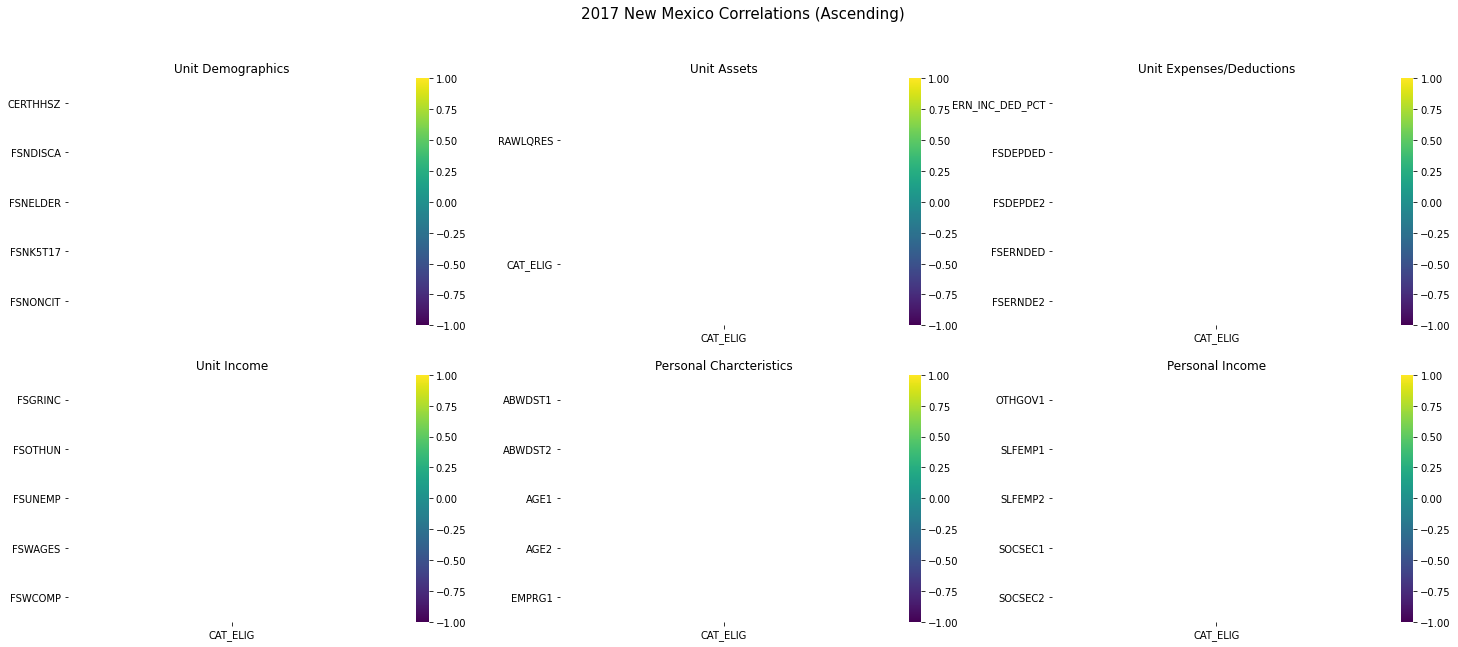

In [45]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 New Mexico Correlations (Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit17_demo, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit17_assets, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit17_exded, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per17_char, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_nm17.png');

C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


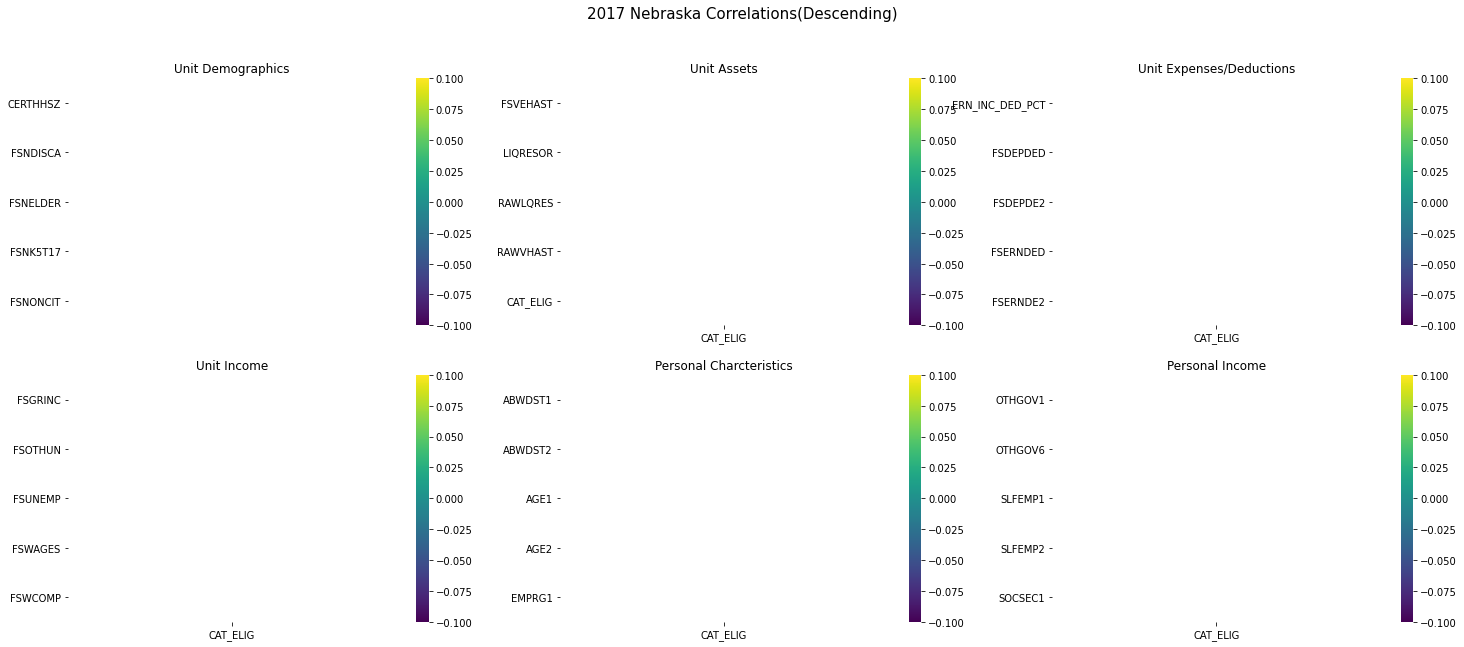

In [46]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 Nebraska Correlations(Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit17_demo, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit17_assets, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit17_exded, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per17_char, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_ne17.png');

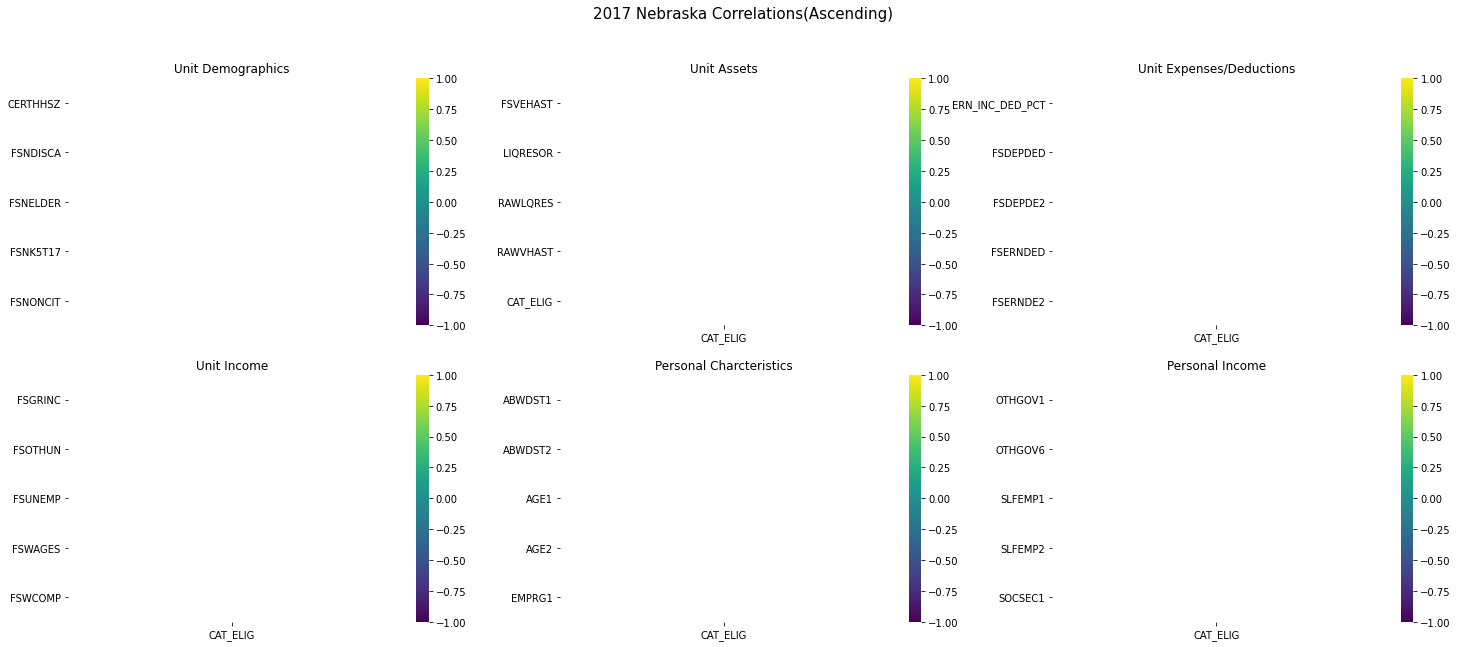

In [47]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 Nebraska Correlations(Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit17_demo, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit17_assets, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit17_exded, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per17_char, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_ne17.png');

# Observations

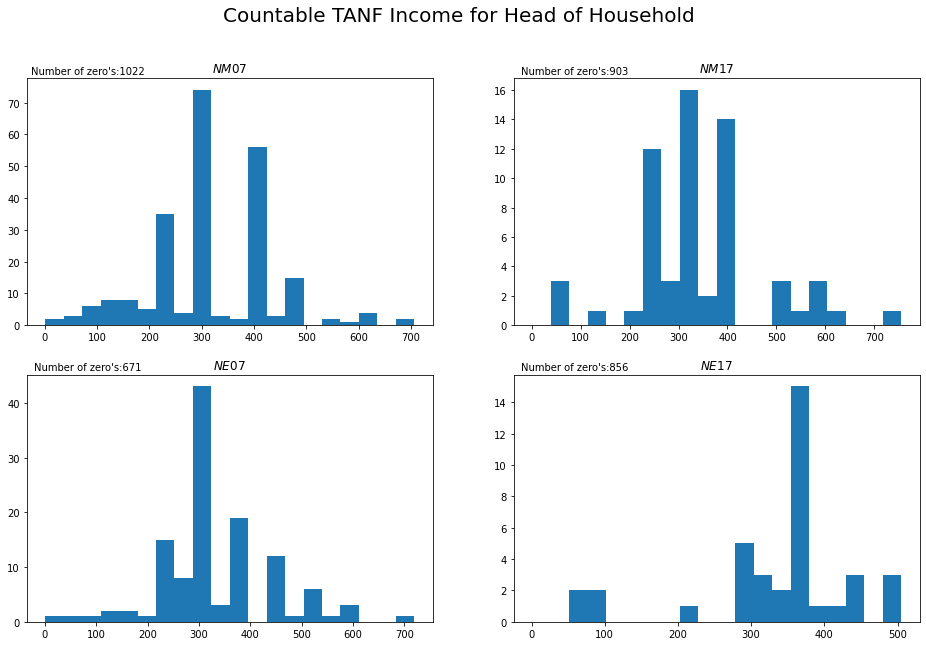

In [19]:
sc.plot_features_hist('FSTANF','unit_tanf',"Countable TANF Income for Head of Household")

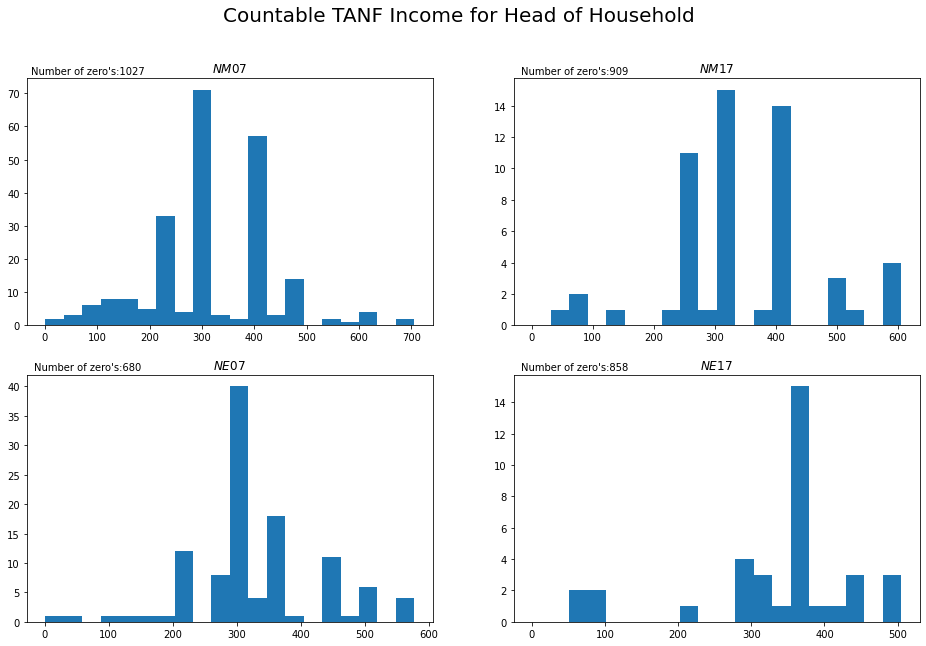

In [20]:
sc.plot_features_hist('TANF1','pers_tanf1',"Countable TANF Income for Head of Household")

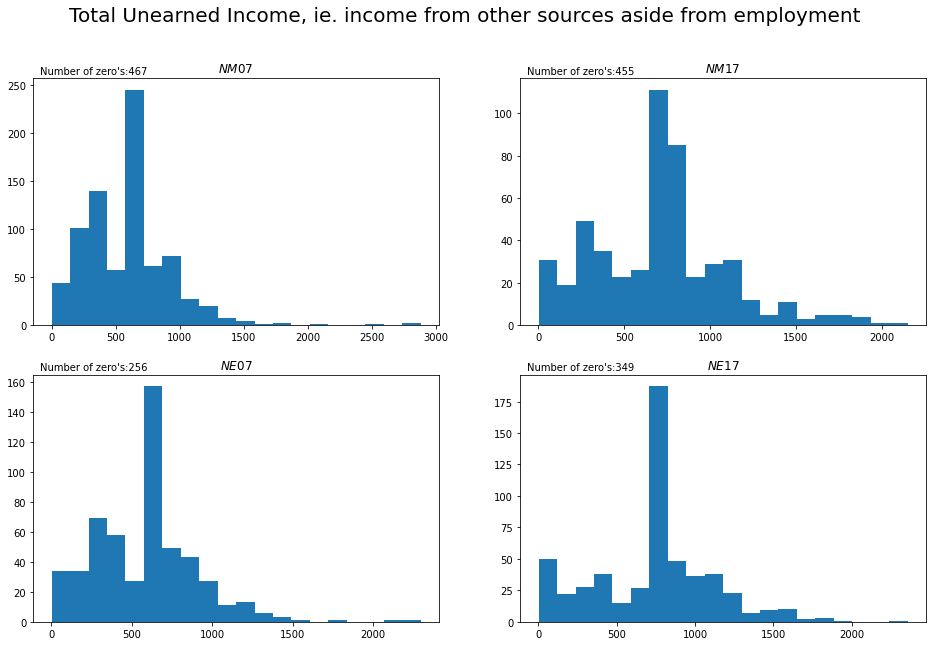

In [21]:
sc.plot_features_hist('FSUNEARN','unit_unearn',"Total Unearned Income, ie. income from other sources aside from employment")

C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bhakt\anaconda3\lib\si

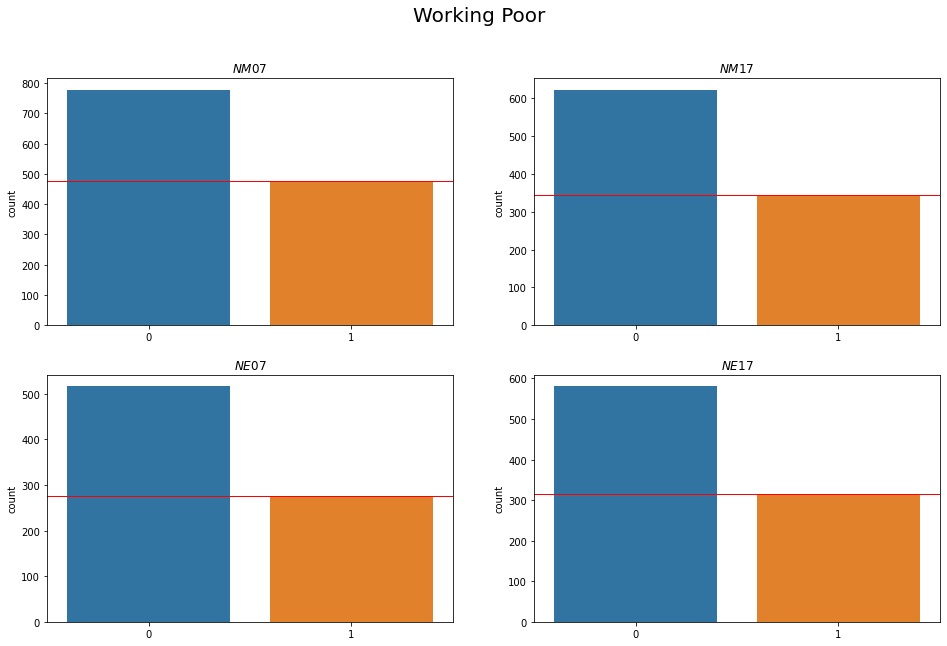

In [22]:
sc.plot_features('WRK_POOR','wrk_pr',"Working Poor")

C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


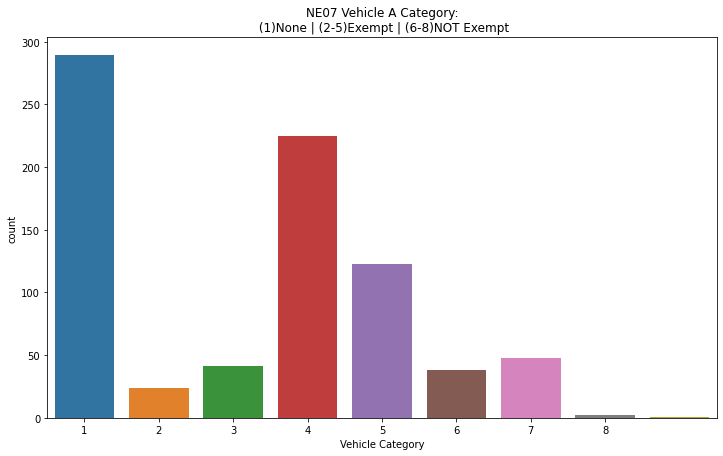

In [23]:
plt.figure(figsize = (12,7))
sns.countplot(ne07['VEHICLEA'])
plt.xticks(np.arange(8),labels=[1,2,3,4,5,6,7,8])
plt.xlabel("Vehicle Category")
plt.title("NE07 Vehicle A Category:\n (1)None | (2-5)Exempt | (6-8)NOT Exempt")
plt.savefig("./images/ind_features/vehA.png");

## Correlated Features

I will be using all of the top and bottom indicators for a final dataset of values to be passed into a model for prediction.

In [24]:
set1 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11

In [25]:
set1 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11
corr_features=set(corr_features)
corr_features.remove('CAT_ELIG')

In [26]:
print(f'There are {len(corr_features)} features in corr_features:\n')
corr_features

There are 32 features in corr_features:



{'CERTHHSZ',
 'FSASSET',
 'FSDIS',
 'FSEARN',
 'FSERNDE2',
 'FSERNDED',
 'FSGA',
 'FSGRINC',
 'FSNELDER',
 'FSNETINC',
 'FSNONCIT',
 'FSSLTDE2',
 'FSSLTDED',
 'FSSSI',
 'FSSTDDE2',
 'FSTANF',
 'FSTOTDE2',
 'FSTOTDED',
 'FSUNEARN',
 'FSUSIZE',
 'FSVEHAST',
 'FSWAGES',
 'HWGT',
 'LIQRESOR',
 'RAWERND',
 'RAWNET',
 'REALPROP',
 'SHELDED',
 'TANF_IND',
 'TPOV',
 'VEHICLEA',
 'WRK_POOR'}

# Final Dataset

In [27]:
corr_features=list(corr_features)
pd.DataFrame(corr_features,columns=['Table 1']).to_csv("./SNAP_Data/corr_features.csv",index=None)

In [28]:
df1 = sc.final(corr_features,nm07)
df2 = sc.final(corr_features,nm17)
df3 = sc.final(corr_features,ne07)
df4 = sc.final(corr_features,ne17)

In [29]:
df = pd.concat([df1,df2,df3,df4])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 893
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FSERNDED  3904 non-null   float64
 1   REALPROP  2046 non-null   float64
 2   FSNETINC  3904 non-null   float64
 3   FSGRINC   3904 non-null   float64
 4   RAWERND   3904 non-null   float64
 5   LIQRESOR  2940 non-null   float64
 6   HWGT      3904 non-null   float64
 7   FSSLTDED  3904 non-null   float64
 8   FSSSI     3904 non-null   float64
 9   FSTOTDED  3904 non-null   float64
 10  FSWAGES   3904 non-null   float64
 11  FSSLTDE2  3904 non-null   float64
 12  FSEARN    3904 non-null   float64
 13  FSTOTDE2  3904 non-null   float64
 14  FSASSET   2940 non-null   float64
 15  FSGA      3904 non-null   float64
 16  CERTHHSZ  3904 non-null   float64
 17  TANF_IND  3904 non-null   float64
 18  SHELDED   3904 non-null   float64
 19  FSERNDE2  3904 non-null   float64
 20  FSNELDER  3904 non-null   float

In [31]:
df.isnull().sum()

FSERNDED       0
REALPROP    1858
FSNETINC       0
FSGRINC        0
RAWERND        0
LIQRESOR     964
HWGT           0
FSSLTDED       0
FSSSI          0
FSTOTDED       0
FSWAGES        0
FSSLTDE2       0
FSEARN         0
FSTOTDE2       0
FSASSET      964
FSGA           0
CERTHHSZ       0
TANF_IND       0
SHELDED        0
FSERNDE2       0
FSNELDER       0
WRK_POOR       0
FSUSIZE        0
TPOV           0
RAWNET         0
FSDIS          0
FSNONCIT       0
FSSTDDE2       0
FSTANF         0
FSUNEARN       0
CAT_ELIG       0
FSVEHAST    2219
VEHICLEA    3113
dtype: int64

We have some expected null values in the final dataframe since not all fields in all 4 datasets made it past the initial cuts. VEHICLEA will be replaced with a 1, all others will be filled with 0.

In [32]:
df['VEHICLEA']=df['VEHICLEA'].fillna(1)

In [33]:
df.isnull().sum()

FSERNDED       0
REALPROP    1858
FSNETINC       0
FSGRINC        0
RAWERND        0
LIQRESOR     964
HWGT           0
FSSLTDED       0
FSSSI          0
FSTOTDED       0
FSWAGES        0
FSSLTDE2       0
FSEARN         0
FSTOTDE2       0
FSASSET      964
FSGA           0
CERTHHSZ       0
TANF_IND       0
SHELDED        0
FSERNDE2       0
FSNELDER       0
WRK_POOR       0
FSUSIZE        0
TPOV           0
RAWNET         0
FSDIS          0
FSNONCIT       0
FSSTDDE2       0
FSTANF         0
FSUNEARN       0
CAT_ELIG       0
FSVEHAST    2219
VEHICLEA       0
dtype: int64

In [34]:
df = df.fillna(0)

In [35]:
df.isnull().sum().sum()

0

In [36]:
df.to_csv('./SNAP_Data/final.csv',index=None)